In [1]:
"""
Created on Sat Aug 3 19:05:33 2024
@author: shikha
"""
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

# Setting the current working directory
current_directory = os.getcwd()
os.chdir(current_directory)

# Loading the annotation CSV file
ann_file_path = 'data/annotations.csv'  # Annotation file name (can also pass the full path to the file)
df_ann = pd.read_csv(ann_file_path)  # Reading the .csv file

################# Checking for any empty rows ##############################
# Checking whether each row contains any missing values
missing_values_per_row = df_ann.isna().any(axis=1)
# Counting the number of rows that contain any missing values
number_of_empty_rows = missing_values_per_row.sum()
# Printing the number of empty rows
print(f'Number of rows with missing values: {number_of_empty_rows}')

if number_of_empty_rows > 0:
    # Printing the rows with missing values for inspection
    empty_rows = df_ann[missing_values_per_row]
    print(empty_rows)
#######################################################################################

Number of rows with missing values: 0


In [2]:
################# Visualization of the Data Distribution by Class ##############################
# Displaying the first few rows of the annotation dataframe to understand its structure
print(df_ann.head())

# Printing the column names (fields of each column)
print("Columns in the dataset:", df_ann.columns.tolist())

# Creating a folder to save the dataset plots
output_dir = 'dataset_plots/plt_dataset_plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)



      Image Name Majority Vote Label  \
0  MHIST_aaa.png                 SSA   
1  MHIST_aab.png                  HP   
2  MHIST_aac.png                 SSA   
3  MHIST_aae.png                  HP   
4  MHIST_aaf.png                 SSA   

   Number of Annotators who Selected SSA (Out of 7) Partition  
0                                                 6     train  
1                                                 0     train  
2                                                 5     train  
3                                                 1     train  
4                                                 5     train  
Columns in the dataset: ['Image Name', 'Majority Vote Label', 'Number of Annotators who Selected SSA (Out of 7)', 'Partition']


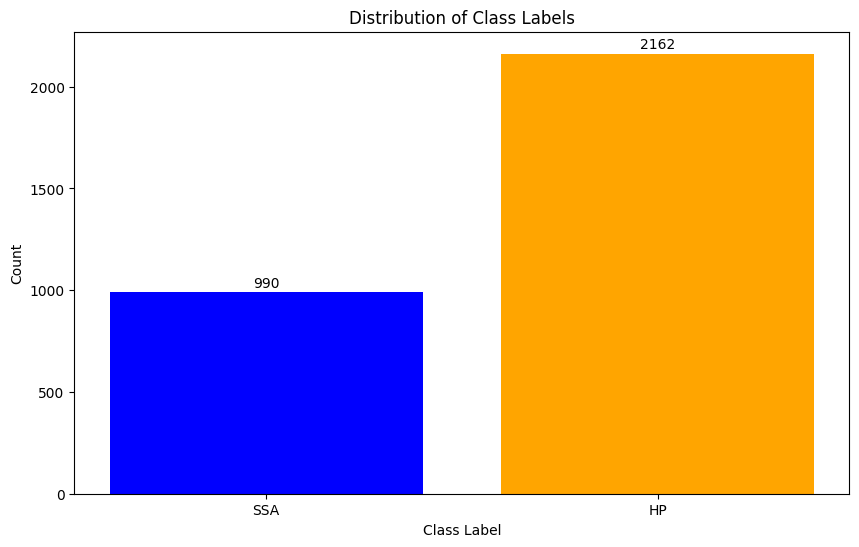

In [3]:
# Visualization of the Distribution of the 'Majority Vote Label' Column
class_counts = df_ann['Majority Vote Label'].value_counts()

plt.figure(figsize=(10, 6))  # Setting the figure size

# Plotting the bar chart, reversing the order to plot SSA first and then HP
bars = plt.bar(class_counts.index[::-1], class_counts.values[::-1], color=['blue', 'orange'])

# Adding title and labels
plt.title('Distribution of Class Labels')  # Title of the plot
plt.xlabel('Class Label')  # X-axis label
plt.ylabel('Count')  # Y-axis label

# Adding the count at the top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, int(yval), ha='center', va='bottom')

# Saving the plot with full resolution
plot_filename = os.path.join(output_dir, 'distribution_of_class_labels.png')
plt.savefig(plot_filename, dpi=300, bbox_inches='tight')

# Displaying the plot
plt.show()


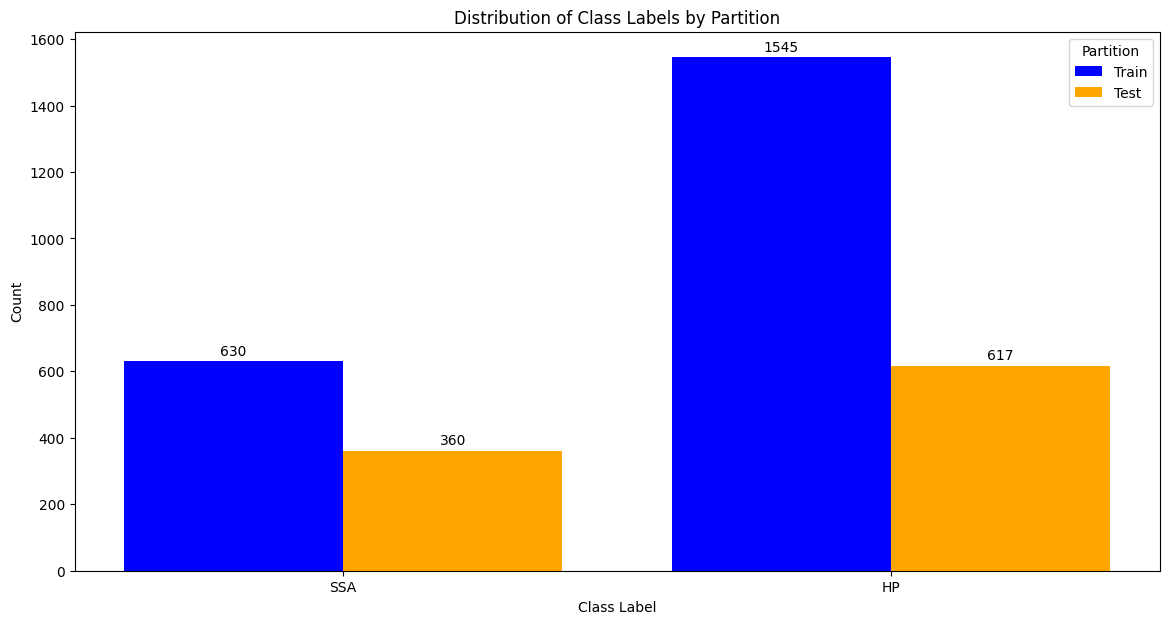

In [4]:
# Distribution of Class Labels by Partition
train_counts = df_ann[df_ann['Partition'] == 'train']['Majority Vote Label'].value_counts()
test_counts = df_ann[df_ann['Partition'] == 'test']['Majority Vote Label'].value_counts()

# Define the labels and corresponding values for the train and test sets
labels = ['SSA', 'HP']
train_values = [train_counts.get(label, 0) for label in labels]
test_values = [test_counts.get(label, 0) for label in labels]

x = range(len(labels))

plt.figure(figsize=(14, 7))  # Setting the figure size

# Plotting the bars for train and test partitions
bars1 = plt.bar(x, train_values, width=0.4, label='Train', color='blue', align='center')
bars2 = plt.bar([i + 0.4 for i in x], test_values, width=0.4, label='Test', color='orange', align='center')

# Adding title and labels
plt.title('Distribution of Class Labels by Partition')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.xticks([i + 0.2 for i in x], labels)
plt.legend(title='Partition')

# Adding the count at the top of each bar
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, int(yval), ha='center', va='bottom')

# Saving the plot with full resolution
plot_filename = os.path.join(output_dir, 'distribution_of_class_labels_by_partition.png')
plt.savefig(plot_filename, dpi=300, bbox_inches='tight')

# Displaying the plot
plt.show()


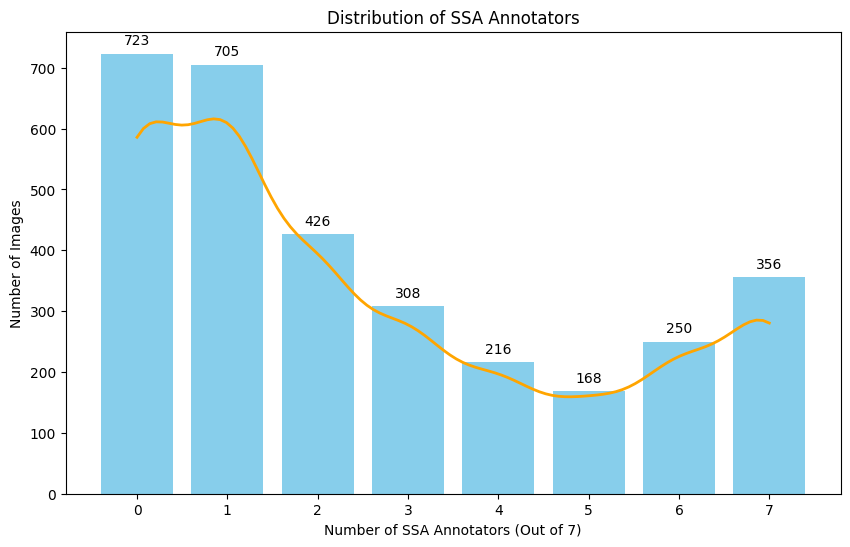

In [5]:
# Distribution of Number of Annotators who Selected SSA
annotator_counts = df_ann['Number of Annotators who Selected SSA (Out of 7)'].value_counts().sort_index()

plt.figure(figsize=(10, 6))

# Plotting the bar chart
bars = plt.bar(annotator_counts.index, annotator_counts.values, color='skyblue')

# Adding title and labels
plt.title('Distribution of SSA Annotators')
plt.xlabel('Number of SSA Annotators (Out of 7)')
plt.ylabel('Number of Images')

# Adding the count at the top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, int(yval), ha='center', va='bottom')

# Adding KDE curve (KDE provides a smooth curve that estimates the underlying probability density function of the data)
annotator_values = df_ann['Number of Annotators who Selected SSA (Out of 7)'].dropna().values
kde = gaussian_kde(annotator_values)
x_vals = np.linspace(annotator_counts.index.min(), annotator_counts.index.max(), 100)
kde_vals = kde(x_vals) * len(annotator_values) * (annotator_counts.index.max() - annotator_counts.index.min()) / len(annotator_counts.index)
plt.plot(x_vals, kde_vals, color='orange', linewidth=2)

# Saving the plot with full resolution
plot_filename = os.path.join(output_dir, 'distribution_of_SSA_annotators_with_kde.png')
plt.savefig(plot_filename, dpi=300, bbox_inches='tight')

# Displaying the plot
plt.show()


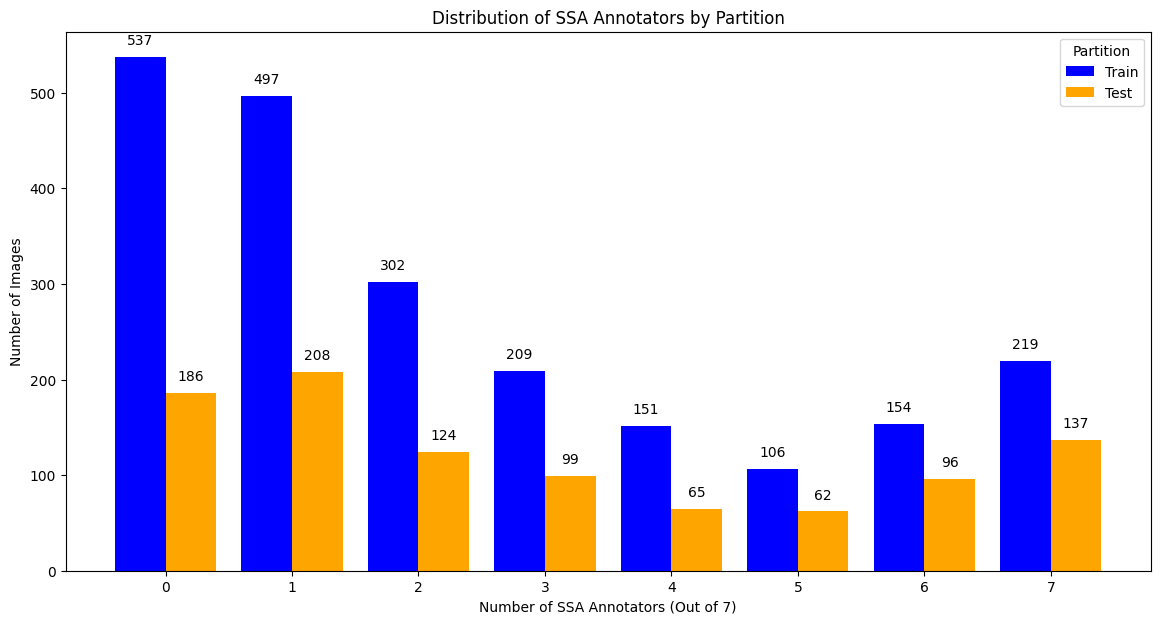

In [6]:
# Distribution of Number of Annotators by Partition
train_annotator_counts = df_ann[df_ann['Partition'] == 'train']['Number of Annotators who Selected SSA (Out of 7)'].value_counts().sort_index()
test_annotator_counts = df_ann[df_ann['Partition'] == 'test']['Number of Annotators who Selected SSA (Out of 7)'].value_counts().sort_index()

# Define the x-axis range (number of annotators from 0 to 7)
x = range(8)
train_values = [train_annotator_counts.get(i, 0) for i in x]
test_values = [test_annotator_counts.get(i, 0) for i in x]

plt.figure(figsize=(14, 7))  # Setting the figure size

# Plotting the bars for train and test partitions
bars1 = plt.bar(x, train_values, width=0.4, label='Train', color='blue', align='center')
bars2 = plt.bar([i + 0.4 for i in x], test_values, width=0.4, label='Test', color='orange', align='center')

# Adding title and labels
plt.title('Distribution of SSA Annotators by Partition')
plt.xlabel('Number of SSA Annotators (Out of 7)')
plt.ylabel('Number of Images')
plt.xticks([i + 0.2 for i in x], x)
plt.legend(title='Partition')

# Adding the count at the top of each bar
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, int(yval), ha='center', va='bottom')

# Saving the plot with full resolution
plot_filename = os.path.join(output_dir, 'distribution_of_SSA_annotators_by_partition.png')
plt.savefig(plot_filename, dpi=300, bbox_inches='tight')

# Displaying the plot
plt.show()


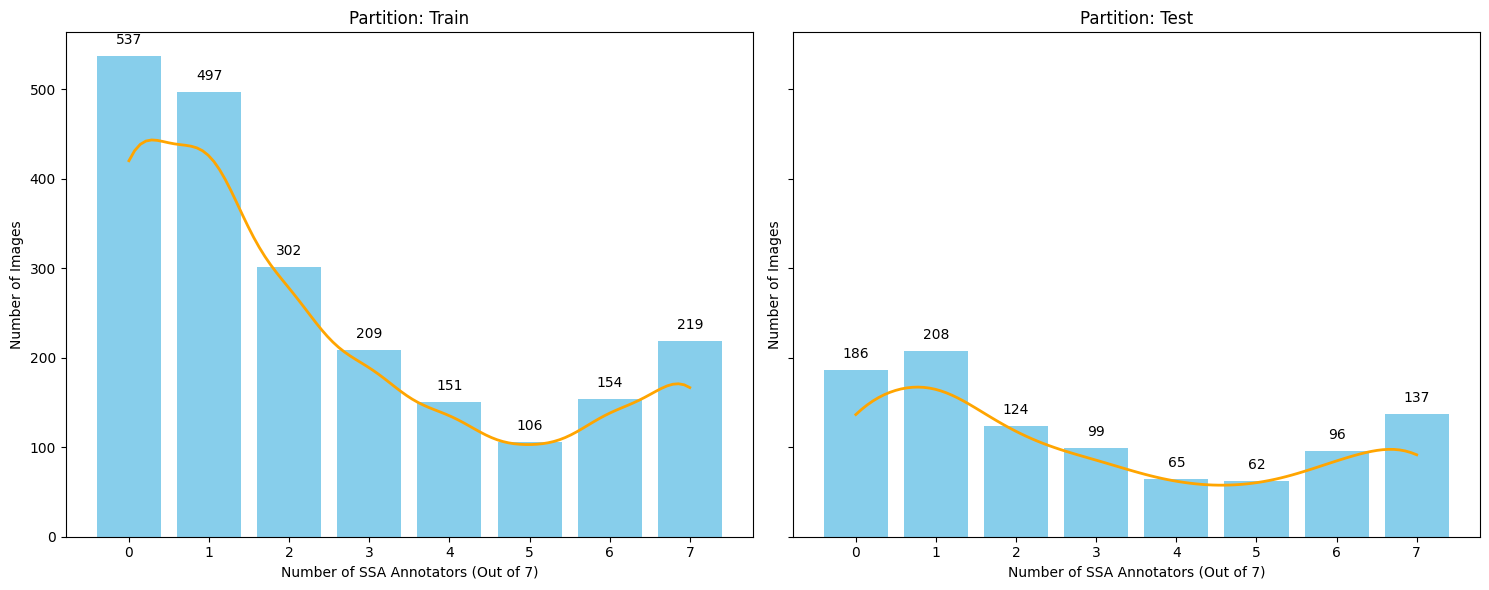

In [7]:
# Filtering the data to include only valid annotator values (0 to 7)
df_filtered = df_ann[df_ann['Number of Annotators who Selected SSA (Out of 7)'].isin(range(8))]

# Separate the data by partition
train_data = df_filtered[df_filtered['Partition'] == 'train']
test_data = df_filtered[df_filtered['Partition'] == 'test']

# Create subplots for each partition
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Define a function to add bar and KDE plot
def add_bar_and_kde(ax, data, title):
    annotator_counts = data['Number of Annotators who Selected SSA (Out of 7)'].value_counts().sort_index()
    bars = ax.bar(annotator_counts.index, annotator_counts.values, color='skyblue')
    ax.set_title(title)
    ax.set_xlabel('Number of SSA Annotators (Out of 7)')
    ax.set_ylabel('Number of Images')

    # Adding the count at the top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 10, int(yval), ha='center', va='bottom')

    # Add KDE curve
    annotator_values = data['Number of Annotators who Selected SSA (Out of 7)'].dropna().values
    kde = gaussian_kde(annotator_values)
    x_vals = np.linspace(annotator_counts.index.min(), annotator_counts.index.max(), 100)
    kde_vals = kde(x_vals) * len(annotator_values) * (annotator_counts.index.max() - annotator_counts.index.min()) / len(annotator_counts.index)
    ax.plot(x_vals, kde_vals, color='orange', linewidth=2)

# Add plots to subplots
add_bar_and_kde(axes[0], train_data, 'Partition: Train')
add_bar_and_kde(axes[1], test_data, 'Partition: Test')

plt.tight_layout()
plot_filename = os.path.join(output_dir, 'distribution_of_SSA_annotators_by_partition.png')
plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
plt.show()


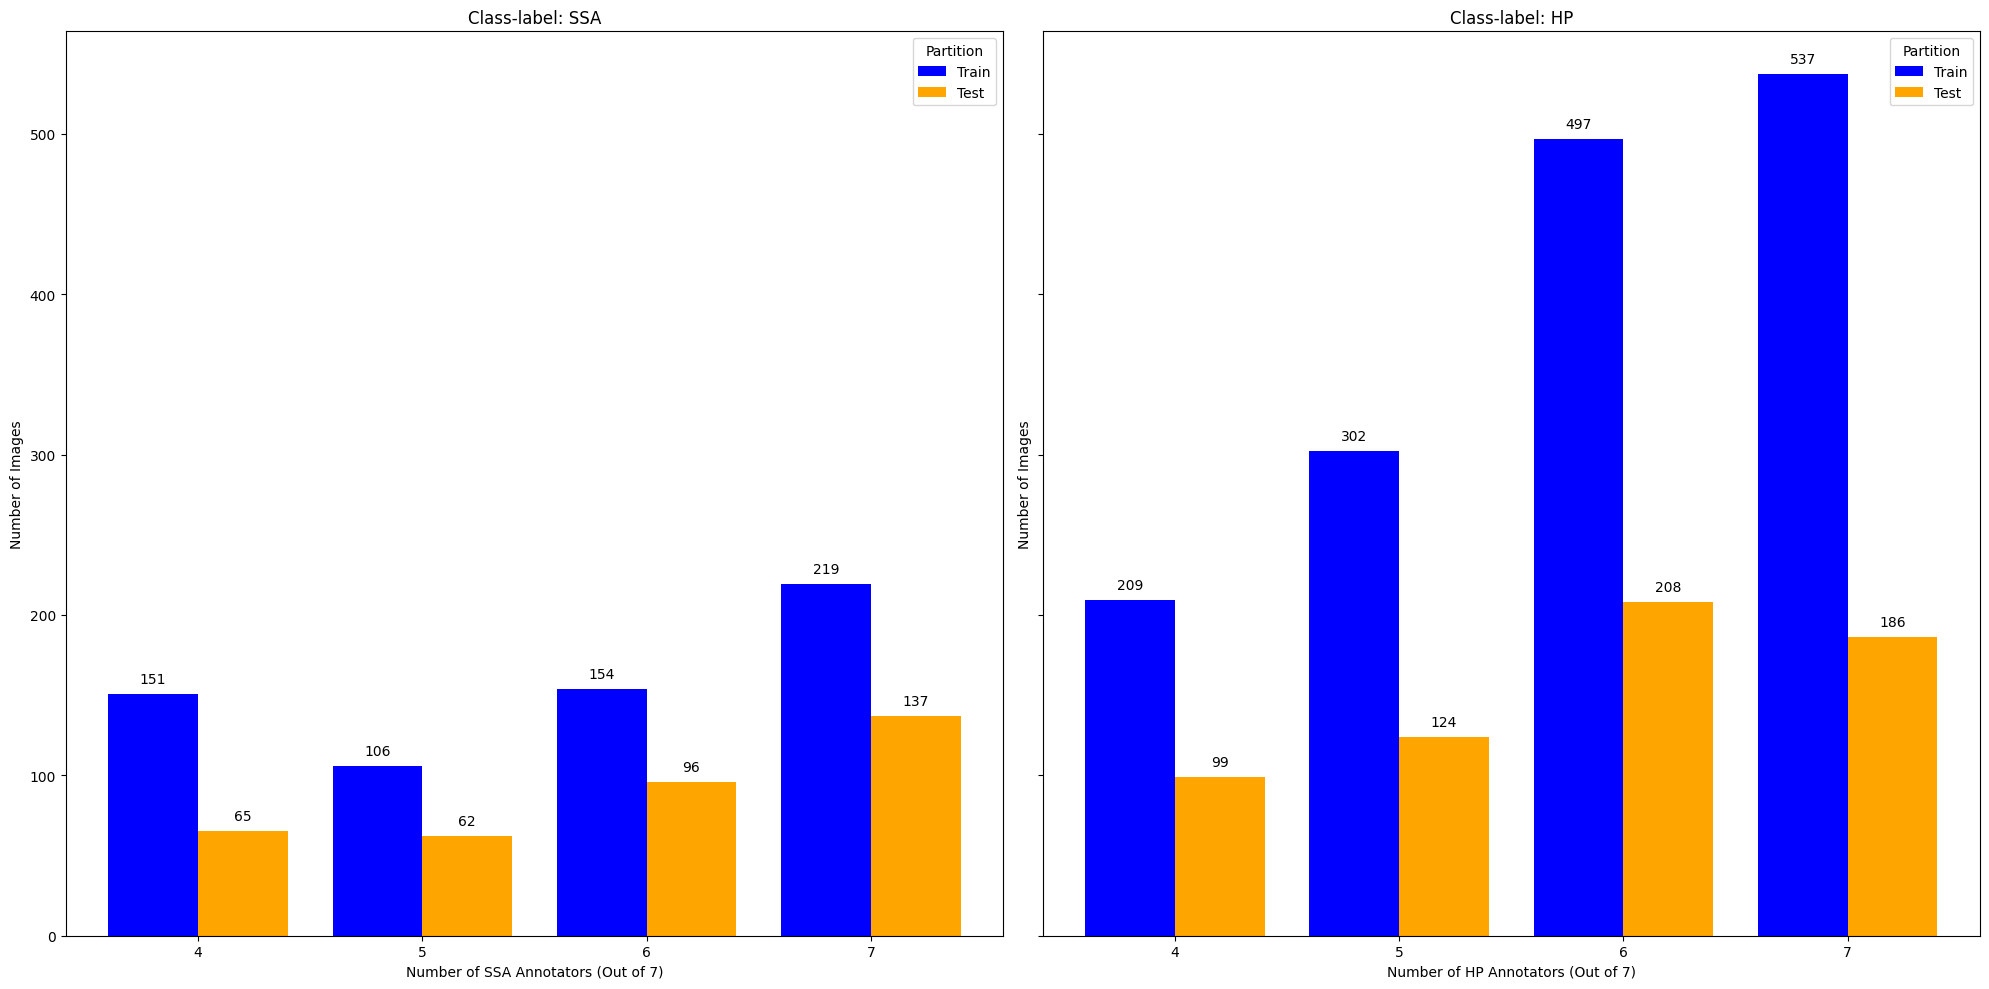

In [8]:
# Distribution of Annotators with Class-Labels

# Calculate the number of HP Annotators
df_ann['HP Annotators'] = df_ann.apply(
    lambda row: 7 - row['Number of Annotators who Selected SSA (Out of 7)'] if row['Majority Vote Label'] == 'HP' else row['Number of Annotators who Selected SSA (Out of 7)'],
    axis=1
)

# Separate data by class label
df_ann_ssa = df_ann[df_ann['Majority Vote Label'] == 'SSA']
df_ann_hp = df_ann[df_ann['Majority Vote Label'] == 'HP']

# Create subplots for SSA and HP classes
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

# Plotting SSA class
ssa_counts = df_ann_ssa.groupby(['Number of Annotators who Selected SSA (Out of 7)', 'Partition']).size().unstack(fill_value=0)
x = range(4, 8)
train_values = ssa_counts.loc[x, 'train'].values
test_values = ssa_counts.loc[x, 'test'].values

bars1 = axes[0].bar(x, train_values, width=0.4, label='Train', color='blue', align='center')
bars2 = axes[0].bar([i + 0.4 for i in x], test_values, width=0.4, label='Test', color='orange', align='center')
axes[0].set_title('Class-label: SSA')
axes[0].set_xlabel('Number of SSA Annotators (Out of 7)')
axes[0].set_ylabel('Number of Images')
axes[0].legend(title='Partition')

# Setting x-ticks for SSA plot
axes[0].set_xticks([i + 0.2 for i in x])
axes[0].set_xticklabels(x)

# Annotating bars in SSA plot
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:
            axes[0].text(bar.get_x() + bar.get_width() / 2, yval + 5, int(yval), ha='center', va='bottom')

# Plotting HP class
hp_counts = df_ann_hp.groupby(['HP Annotators', 'Partition']).size().unstack(fill_value=0)
x = range(4, 8)
train_values = hp_counts.loc[x, 'train'].values
test_values = hp_counts.loc[x, 'test'].values

bars1 = axes[1].bar(x, train_values, width=0.4, label='Train', color='blue', align='center')
bars2 = axes[1].bar([i + 0.4 for i in x], test_values, width=0.4, label='Test', color='orange', align='center')
axes[1].set_title('Class-label: HP')
axes[1].set_xlabel('Number of HP Annotators (Out of 7)')
axes[1].set_ylabel('Number of Images')
axes[1].legend(title='Partition')

# Setting x-ticks for HP plot
axes[1].set_xticks([i + 0.2 for i in x])
axes[1].set_xticklabels(x)

# Annotating bars in HP plot
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:
            axes[1].text(bar.get_x() + bar.get_width() / 2, yval + 5, int(yval), ha='center', va='bottom')

# Adjust layout and save the plot
plt.tight_layout()
plot_filename = os.path.join(output_dir, 'distribution_of_SSA_HP_annotators_by_partition.png')
plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
plt.show()


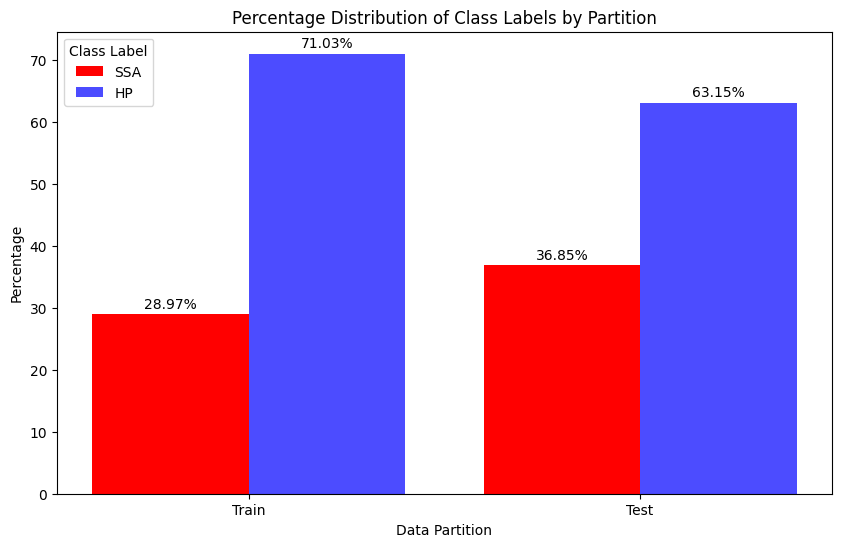

In [9]:
# Percentage Distribution of Class Labels by Partition
train_counts = df_ann[df_ann['Partition'] == 'train']['Majority Vote Label'].value_counts(normalize=True) * 100
test_counts = df_ann[df_ann['Partition'] == 'test']['Majority Vote Label'].value_counts(normalize=True) * 100


# Create a new DataFrame for plotting
df_percentage = pd.DataFrame({
    'Partition': ['train', 'train', 'test', 'test'],
    'Class Label': ['SSA', 'HP', 'SSA', 'HP'],
    'Percentage': [train_counts['SSA'], train_counts['HP'], test_counts['SSA'], test_counts['HP']]
})

x = range(2)
train_values = df_percentage[df_percentage['Class Label'] == 'SSA']['Percentage'].values
test_values = df_percentage[df_percentage['Class Label'] == 'HP']['Percentage'].values

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x, train_values, width=0.4, label='SSA', color=['red', 'red'], align='center')
bars2 = plt.bar([i + 0.4 for i in x], test_values, width=0.4, label='HP', color=['blue', 'blue'], alpha=0.7, align='center')
plt.title('Percentage Distribution of Class Labels by Partition')
plt.xlabel('Data Partition')
plt.ylabel('Percentage')
plt.xticks([i + 0.2 for i in x], ['Train', 'Test'])
plt.legend(title='Class Label')

# Adding the percentage at the top of each bar
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:
            plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom')

plot_filename = os.path.join(output_dir, 'percentage_distribution_of_class_labels.png')
plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
plt.show()
